In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
#plt.style.use('fivethirtyeight')

In [34]:
df = pd.read_csv('/Users/macbookair/PycharmProjects/Big Data Analytics/Crimes in Boston/crime.csv', encoding='iso-8859-1')

In [35]:
df.columns = [str.lower(col) for col in df.columns]
df['date'] = df.occurred_on_date.apply(lambda x: x[:10])
df = df.set_index(df.date)

In [36]:
df

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location,date
date,,,,,,,,,,,,,,,,,,
2018-09-02,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",2018-09-02
2018-08-21,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",2018-08-21
2018-09-03,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",2018-09-03
2018-09-03,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",2018-09-03
2018-09-03,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",2018-09-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-05,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)",2016-06-05
2015-07-09,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)",2015-07-09
2015-07-09,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)",2015-07-09


# Split data into UCR types

In [37]:
ucr1 = df[df.ucr_part == "Part One"]
ucr2 = df[df.ucr_part == "Part Two"]
ucr3 = df[df.ucr_part == "Part Three"]

In [38]:
ucr1

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location,date
date,,,,,,,,,,,,,,,,,,
2018-09-02,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",2018-09-02
2018-09-03,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,2018-09-03 21:25:00,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)",2018-09-03
2018-09-03,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,2018-09-03 20:48:00,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)",2018-09-03
2018-09-02,I182070915,614,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,B2,181,NaN,2018-09-02 18:00:00,2018,9,Sunday,18,Part One,SHIRLEY ST,42.325695,-71.068168,"(42.32569490, -71.06816778)",2018-09-02
2018-09-03,I182070908,522,Residential Burglary,BURGLARY - RESIDENTIAL - NO FORCE,B2,911,NaN,2018-09-03 18:38:00,2018,9,Monday,18,Part One,ANNUNCIATION RD,42.335062,-71.093168,"(42.33506218, -71.09316781)",2018-09-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-07-29,I110261417-00,619,Larceny,LARCENY OTHER $200 & OVER,B2,324,NaN,2016-07-29 00:00:00,2016,7,Friday,0,Part One,BOWDOIN ST,42.307038,-71.066153,"(42.30703835, -71.06615319)",2016-07-29
2016-06-05,I100636670-00,629,Larceny,LARCENY OTHER $50 TO $199,D4,285,NaN,2016-06-05 17:23:00,2016,6,Sunday,17,Part One,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)",2016-06-05
2015-07-27,I100340225-00,339,Robbery,ROBBERY - UNARMED - STREET,A1,77,NaN,2015-07-27 10:47:00,2015,7,Monday,10,Part One,BOWDOIN SQ,42.361645,-71.062299,"(42.36164502, -71.06229949)",2015-07-27


In [56]:
df.district.unique()


array(['D14', 'C11', 'D4', 'B3', 'B2', 'C6', nan, 'A1', 'E5', 'A7', 'E13',
       'E18', 'A15'], dtype=object)

### Splitting UCR1/2/3 in districts

In [40]:
ucr1_d14 = ucr1[ucr1.district == 'D14']
ucr1_c11 = ucr1[ucr1.district == 'C11']
ucr1_d4 = ucr1[ucr1.district == 'D4']
ucr1_b3 = ucr1[ucr1.district == 'B3']
ucr1_b2 = ucr1[ucr1.district == 'B2']
ucr1_c6 = ucr1[ucr1.district == 'C6']
ucr1_a1 = ucr1[ucr1.district == 'A1']
ucr1_e5 = ucr1[ucr1.district == 'E5']
ucr1_a7 = ucr1[ucr1.district == 'A7']
ucr1_e13 = ucr1[ucr1.district == 'E13']
ucr1_e18 = ucr1[ucr1.district == 'E18']
ucr1_a15 = ucr1[ucr1.district == 'A15']


In [41]:
ucr2_d14 = ucr2[ucr2.district == 'D14']
ucr2_c11 = ucr2[ucr2.district == 'C11']
ucr2_d4 = ucr2[ucr2.district == 'D4']
ucr2_b3 = ucr2[ucr2.district == 'B3']
ucr2_b2 = ucr2[ucr2.district == 'B2']
ucr2_c6 = ucr2[ucr2.district == 'C6']
ucr2_a1 = ucr2[ucr2.district == 'A1']
ucr2_e5 = ucr2[ucr2.district == 'E5']
ucr2_a7 = ucr2[ucr2.district == 'A7']
ucr2_e13 = ucr2[ucr2.district == 'E13']
ucr2_e18 = ucr2[ucr2.district == 'E18']
ucr2_a15 = ucr2[ucr2.district == 'A15']

In [42]:
ucr3_d14 = ucr3[ucr3.district == 'D14']
ucr3_c11 = ucr3[ucr3.district == 'C11']
ucr3_d4 = ucr3[ucr3.district == 'D4']
ucr3_b3 = ucr3[ucr3.district == 'B3']
ucr3_b2 = ucr3[ucr3.district == 'B2']
ucr3_c6 = ucr3[ucr3.district == 'C6']
ucr3_a1 = ucr3[ucr3.district == 'A1']
ucr3_e5 = ucr3[ucr3.district == 'E5']
ucr3_a7 = ucr3[ucr3.district == 'A7']
ucr3_e13 = ucr3[ucr3.district == 'E13']
ucr3_e18 = ucr3[ucr3.district == 'E18']
ucr3_a15 = ucr3[ucr3.district == 'A15']

### Dictionnary of districts per UCR type

In [43]:
ucr1_districts={'D14' : ucr1_d14, 'C11' : ucr1_c11, 'D4' : ucr1_d4, 'B3' : ucr1_b3, 'B2':ucr1_b2, 'C6' : ucr1_c6, 'A1': ucr1_a1, 'E5' : ucr1_e5, 'A7' : ucr1_a7, 'E13' : ucr1_e13, 'E18' : ucr1_e18, 'A15' : ucr1_a15}
ucr2_districts={'D14' : ucr2_d14, 'C11' : ucr2_c11, 'D4' : ucr2_d4, 'B3' : ucr2_b3, 'B2':ucr2_b2, 'C6' : ucr2_c6, 'A1': ucr2_a1, 'E5' : ucr2_e5, 'A7' : ucr2_a7, 'E13' : ucr2_e13, 'E18' : ucr2_e18, 'A15' : ucr2_a15}
ucr3_districts={'D14' : ucr3_d14, 'C11' : ucr3_c11, 'D4' : ucr3_d4, 'B3' : ucr3_b3, 'B2':ucr3_b2, 'C6' : ucr3_c6, 'A1': ucr3_a1, 'E5' : ucr3_e5, 'A7' : ucr3_a7, 'E13' : ucr3_e13, 'E18' : ucr3_e18, 'A15' : ucr3_a15}

# Autocorrelation

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### For each district, compute the number of crimes per day

In [45]:
districts =['D14', 'C11', 'D4', 'B3', 'B2', 'C6', 'A1', 'E5', 'A7', 'E13', 'E18', 'A15']

##### Do it for UCR1

In [46]:
for district in districts:
    new_district = ucr1_districts[district].groupby(ucr1_districts[district].date).count()['incident_number']
    ucr1_districts[district] = new_district

##### Do it for UCR2

In [47]:
for district in districts:
    new_district = ucr2_districts[district].groupby(ucr2_districts[district].date).count()['incident_number']
    ucr2_districts[district] = new_district

##### Do it for UCR3

In [48]:
for district in districts:
    new_district = ucr3_districts[district].groupby(ucr3_districts[district].date).count()['incident_number']
    ucr3_districts[district] = new_district

### Now we're ready to plot autocorrelations

##### Do it for UCR1

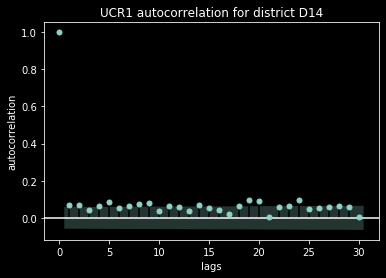

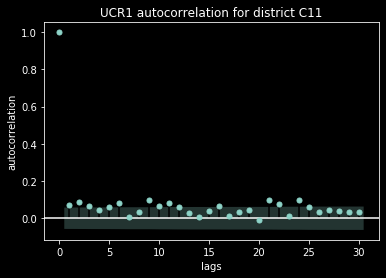

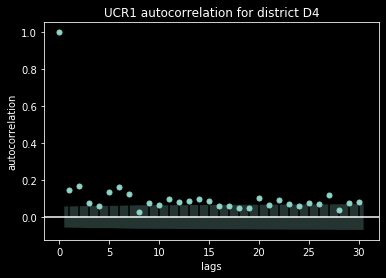

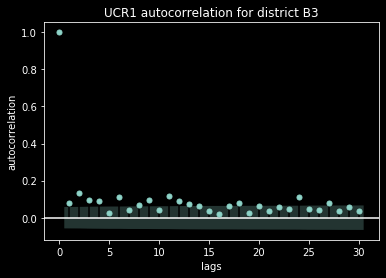

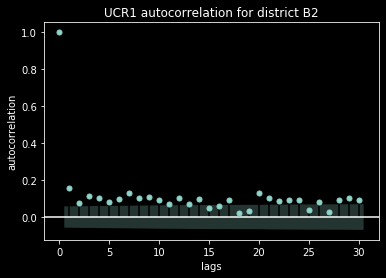

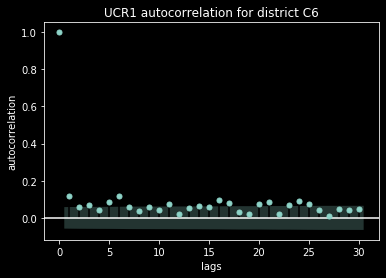

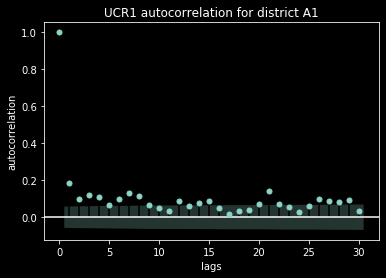

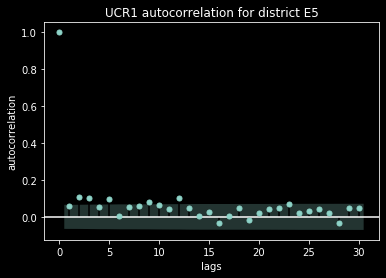

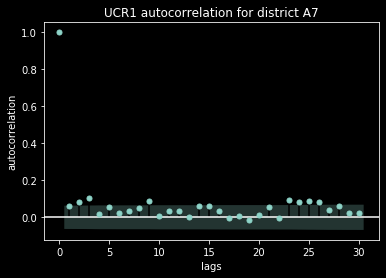

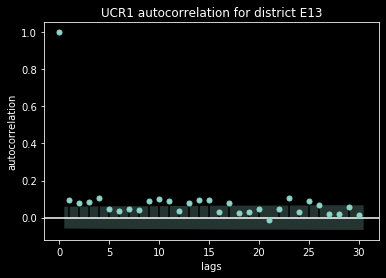

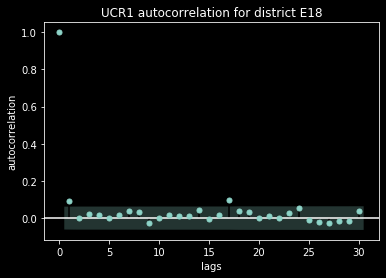

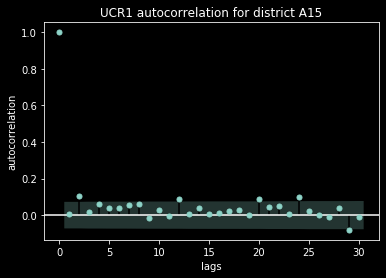

In [63]:
for district in districts:
    plot_acf(ucr1_districts[district], lags=30, alpha=0.05)
    plt.xlabel('lags')
    plt.ylabel('autocorrelation')
    plt.title('UCR1 autocorrelation for district {}'.format(district))
    plt.savefig('/Users/macbookair/GitKraken/BostonCrime/ACF/ACF_UCR1_{}'.format(district))

##### Do it for UCR2

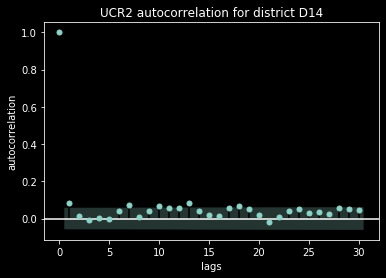

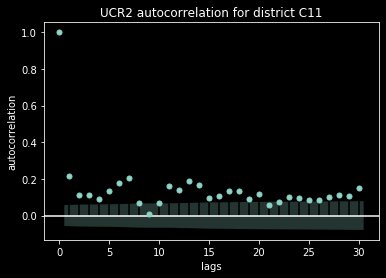

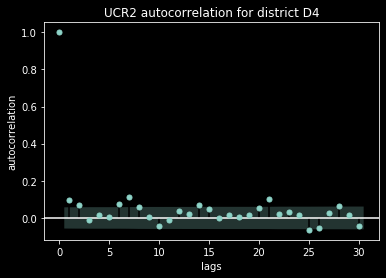

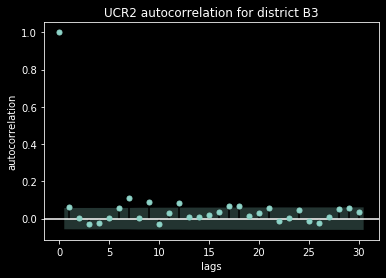

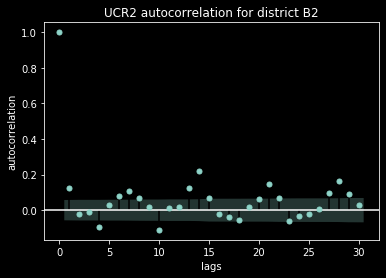

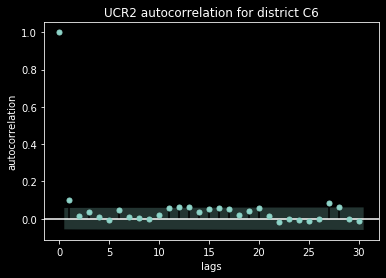

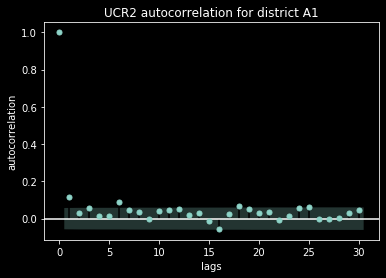

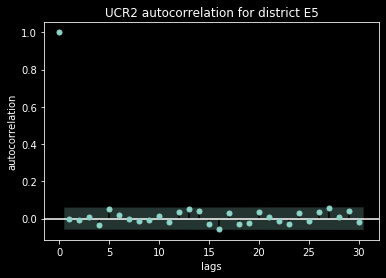

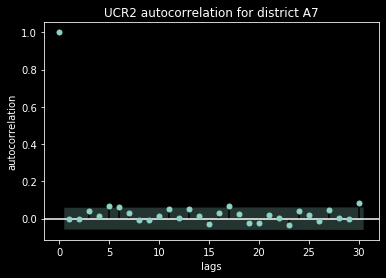

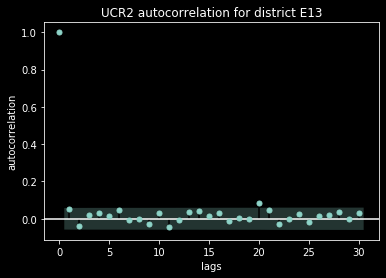

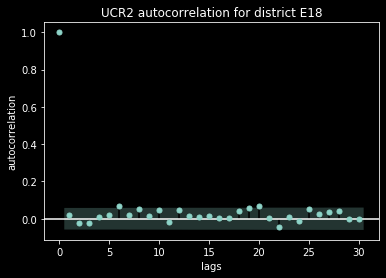

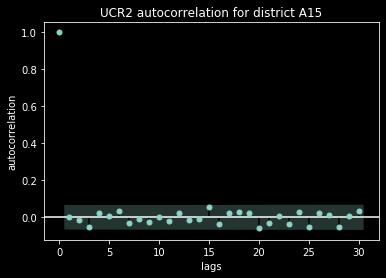

In [64]:
for district in districts:
    plot_acf(ucr2_districts[district], lags=30, alpha=0.05)
    plt.xlabel('lags')
    plt.ylabel('autocorrelation')
    plt.title('UCR2 autocorrelation for district {}'.format(district))
    plt.savefig('/Users/macbookair/GitKraken/BostonCrime/ACF/ACF_UCR2_{}'.format(district))


##### Do it for UCR3

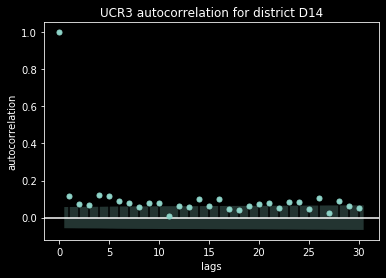

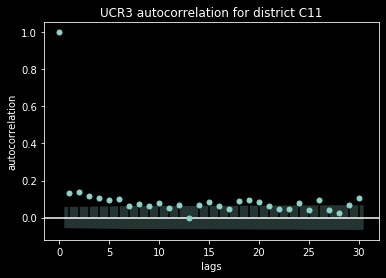

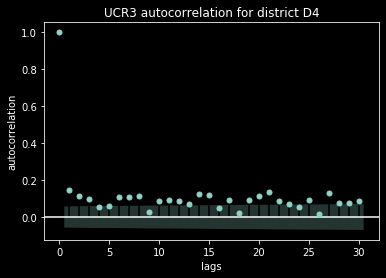

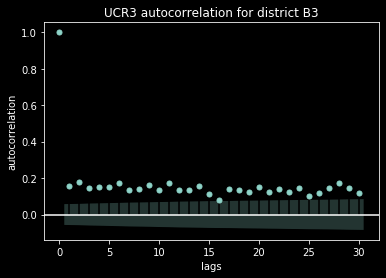

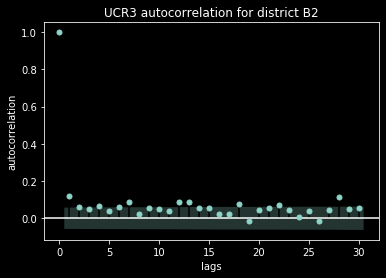

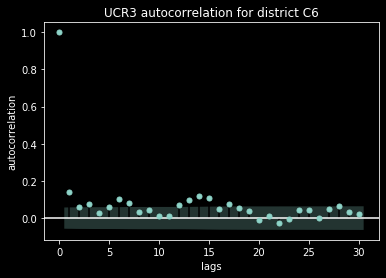

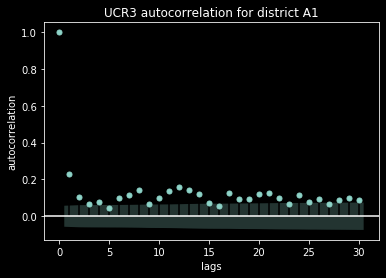

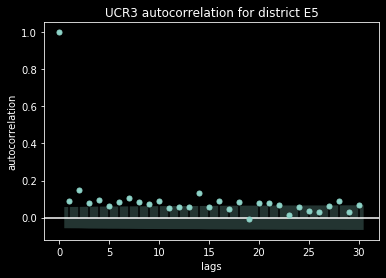

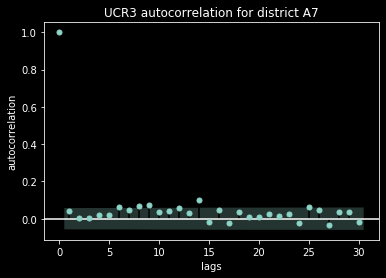

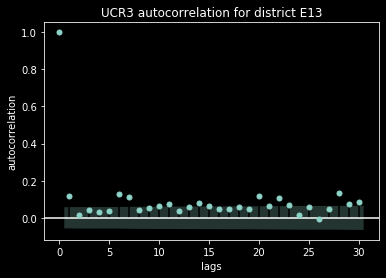

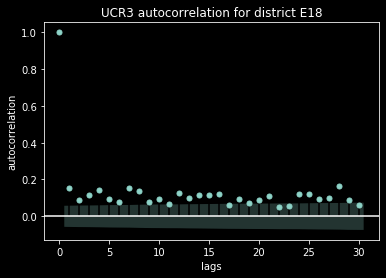

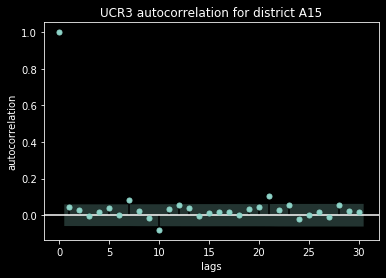

In [65]:
for district in districts:
    plot_acf(ucr3_districts[district], lags=30, alpha=0.05)
    plt.xlabel('lags')
    plt.ylabel('autocorrelation')
    plt.title('UCR3 autocorrelation for district {}'.format(district))
    plt.savefig('/Users/macbookair/GitKraken/BostonCrime/ACF/ACF_UCR3_{}'.format(district))

### Time for partial autocorrelations

##### Do it for UCR1

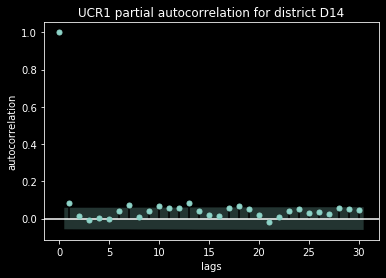

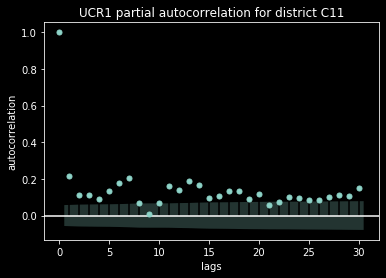

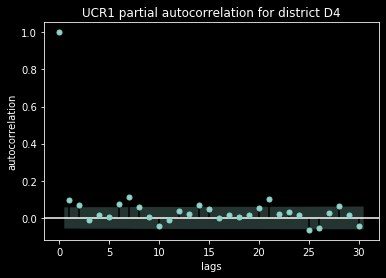

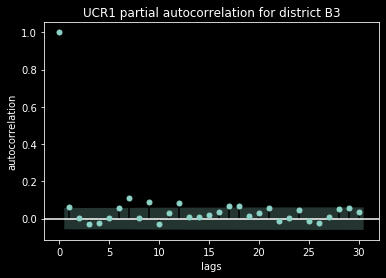

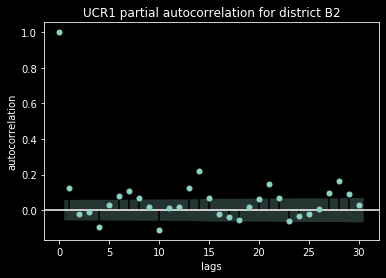

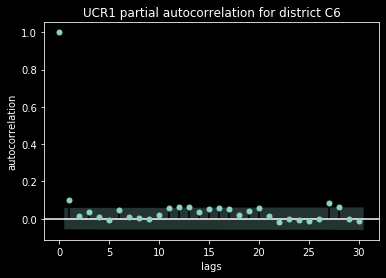

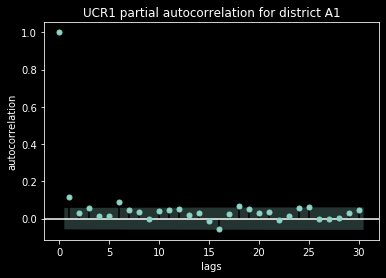

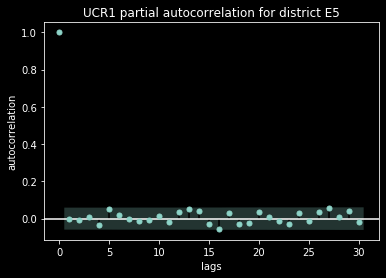

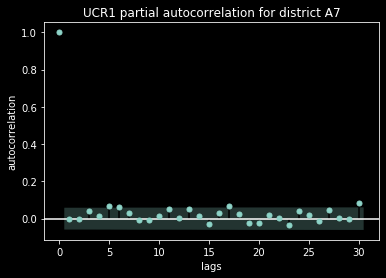

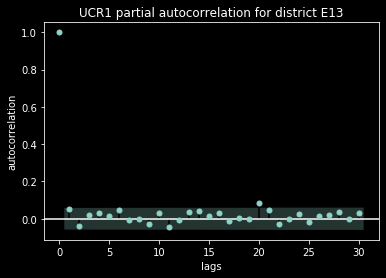

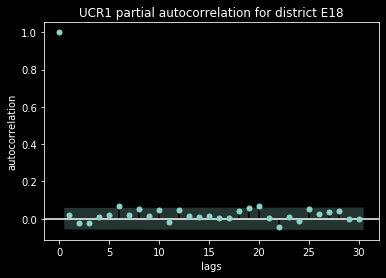

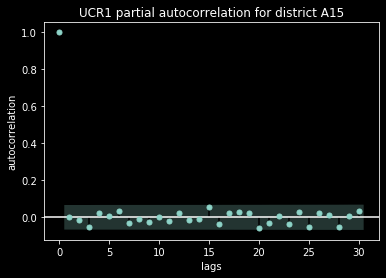

In [66]:
for district in districts:
    plot_acf(ucr2_districts[district], lags=30, alpha=0.05)
    plt.xlabel('lags')
    plt.ylabel('autocorrelation')
    plt.title('UCR1 partial autocorrelation for district {}'.format(district))
    plt.savefig('/Users/macbookair/GitKraken/BostonCrime/PACF/PACF_UCR1_{}'.format(district))

##### Do it for UCR2

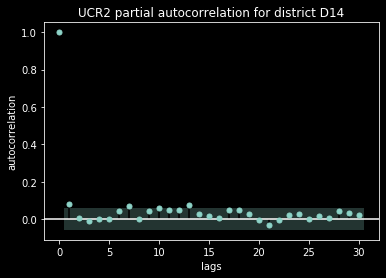

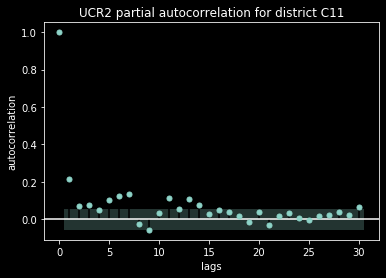

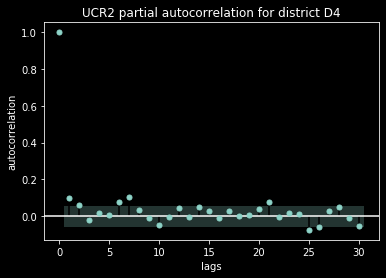

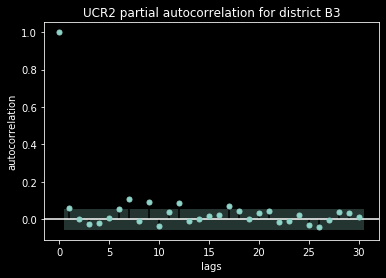

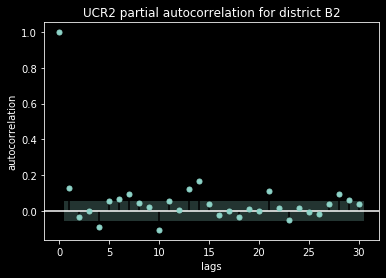

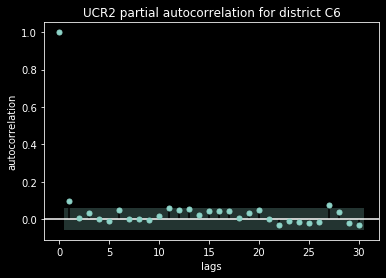

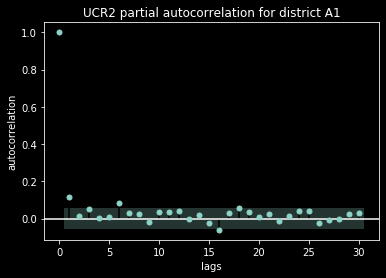

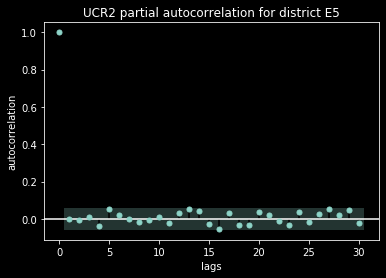

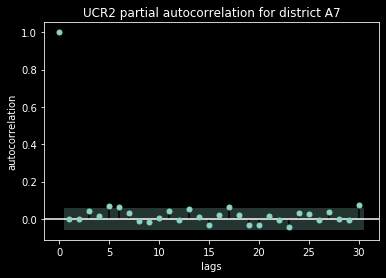

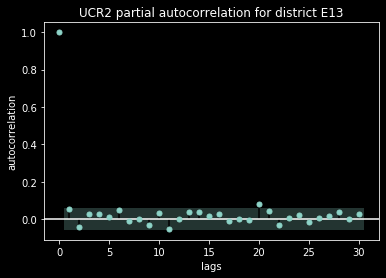

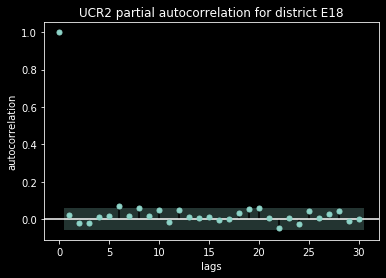

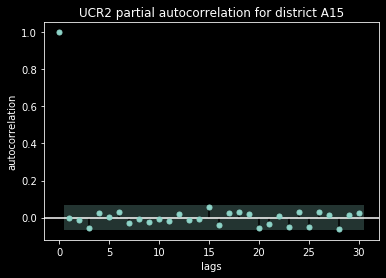

In [67]:
for district in districts:
    plot_pacf(ucr2_districts[district], lags=30, alpha=0.05)
    plt.xlabel('lags')
    plt.ylabel('autocorrelation')
    plt.title('UCR2 partial autocorrelation for district {}'.format(district))
    plt.savefig('/Users/macbookair/GitKraken/BostonCrime/PACF/PACF_UCR2_{}'.format(district))

##### Do it for UCR3

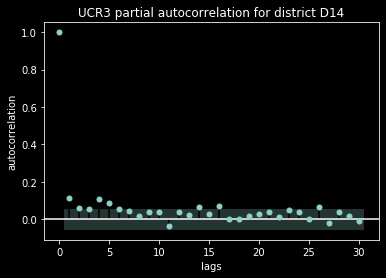

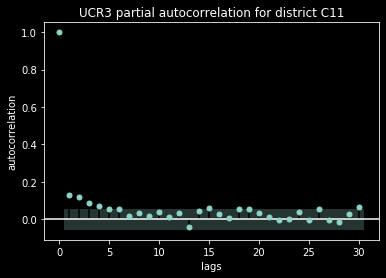

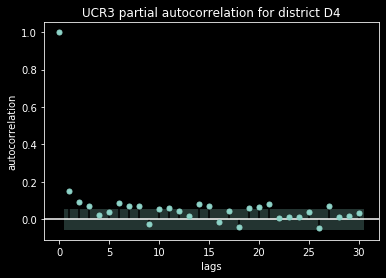

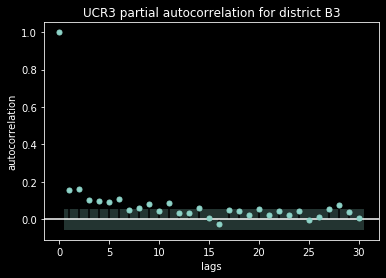

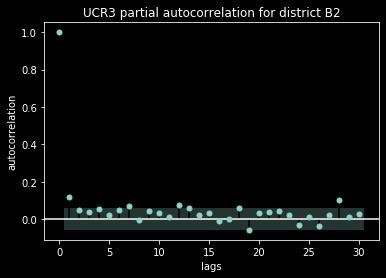

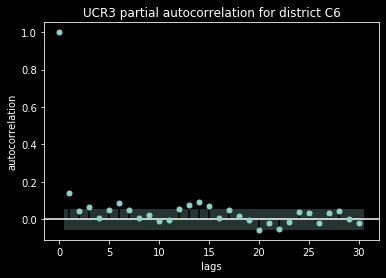

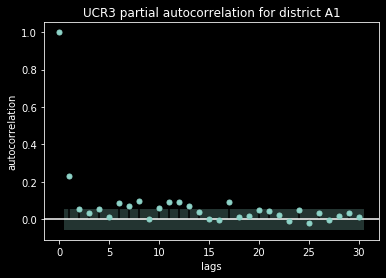

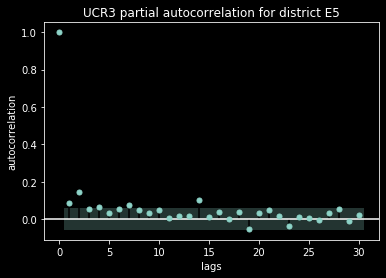

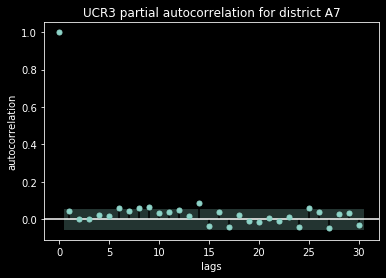

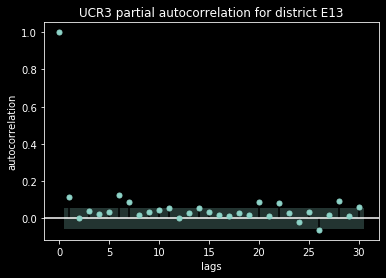

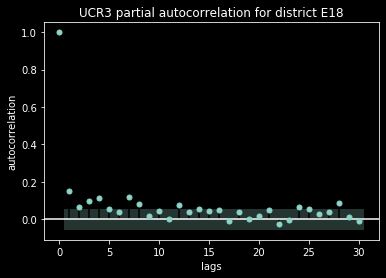

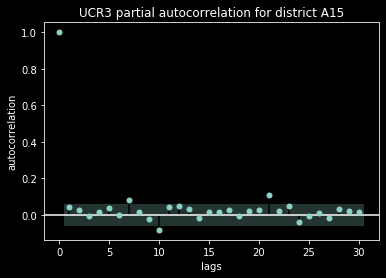

In [68]:
for district in districts:
    plot_pacf(ucr3_districts[district], lags=30, alpha=0.05)
    plt.xlabel('lags')
    plt.ylabel('autocorrelation')
    plt.title('UCR3 partial autocorrelation for district {}'.format(district))
    plt.savefig('/Users/macbookair/GitKraken/BostonCrime/PACF/PACF_UCR3_{}'.format(district))